## Observations and Insights 

<b>Observation 1:</b>

Capomulin and Ramicane are the two most promising treatments. These two should be studied further to determine the best drug regimen. Further data needs to be assessed including, cost, manufacturing ease, and side effects. All of other treatments performed similarly to the placebo.

<b>Observation 2:</b>

The measurement technique for the weight of the mice was flawed. They should be measured to more significant digits. Being measured to each integer, the scatter plot shows a strange distribution. A better correlation and line fit could be achieved if the measurements were improved. It is difficult draw any conclusions from the mouse weight and tumor volume because of this.

<b>Observation 3:</b>

The sample consisted of a roughly equal distribution of male and female mice. Further study could be done on the results on female vs male mice, as well as, mice age.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = mouse_metadata.merge(study_results)
# Display the data table for preview
# print(data.shape)
data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = data['Mouse ID'].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data[data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data.loc[data['Mouse ID'] == 'g989',]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data.loc[data['Mouse ID'] != 'g989',]
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = data['Mouse ID'].nunique()
total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = round(data.groupby('Drug Regimen').mean(),1)
drug_mean = drug_mean['Tumor Volume (mm3)']
drug_median = round(data.groupby('Drug Regimen').median(),1)
drug_var = round(data.groupby('Drug Regimen').var(),1)
drug_var = drug_var['Tumor Volume (mm3)']
drug_median = drug_median['Tumor Volume (mm3)']
drug_std = round(data.groupby('Drug Regimen').std(),2)
drug_std = drug_std['Tumor Volume (mm3)']
drug_sem = round(data.groupby('Drug Regimen').sem(),3)
drug_sem = drug_sem['Tumor Volume (mm3)']


# Assemble the resulting series into a single summary dataframe.
drugs_data = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Variance': drug_var, 'Standard Deviation': drug_std, 'Error': drug_sem})
drugs_data

,Mean,Median,Variance,Standard Deviation,Error
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,4.99,0.329
Ceftamin,52.6,51.8,39.3,6.27,0.470
Infubinol,52.9,51.8,43.1,6.57,0.492
Ketapril,55.2,53.7,68.6,8.28,0.604
Naftisol,54.3,52.5,66.2,8.13,0.596
Placebo,54.0,52.3,61.2,7.82,0.581
Propriva,52.3,50.4,43.9,6.62,0.544
Ramicane,40.2,40.7,23.5,4.85,0.321
Stelasyn,54.2,52.4,59.5,7.71,0.573


## Bar and Pie Charts

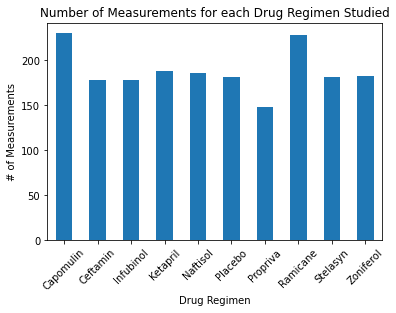

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs_count = data.groupby('Drug Regimen').count()
drugs_count['Mouse ID'].plot(kind='bar', rot = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Measurements')
plt.title('Number of Measurements for each Drug Regimen Studied')
plt.show()


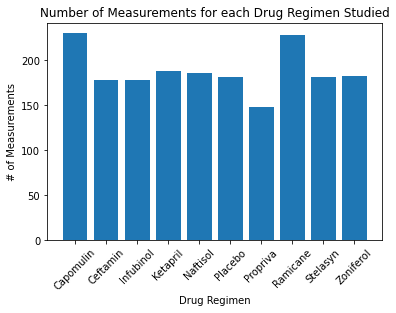

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
labels = list(drugs_count.index.values)
x_axis = np.arange(len(labels))
plt.xticks(x_axis, labels, rotation = 45)
plt.bar(x_axis, drugs_count['Mouse ID'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Measurements')
plt.title('Number of Measurements for each Drug Regimen Studied')
plt.show()





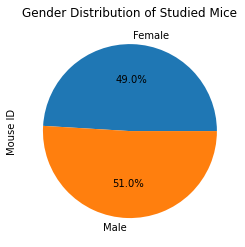

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = data.groupby('Sex').count()
gender_count['Mouse ID'].plot(kind='pie', startangle = 0, autopct='%1.1f%%')
plt.title('Gender Distribution of Studied Mice')
plt.show()


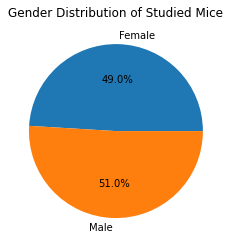

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(gender_count.index.values)
plt.pie(gender_count['Mouse ID'], labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution of Studied Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_data = data[['Mouse ID', 'Timepoint']]
mouse_data = mouse_data.groupby('Mouse ID').max()
mouse_data = mouse_data.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data = mouse_data.merge(data, how='left')
mouse_data.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [13]:
# Datafrome for each drug regimen
Capomulin_data = mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin',]
Capomulin_data = Capomulin_data[['Mouse ID', 'Tumor Volume (mm3)']]
Ramicane_data = mouse_data.loc[mouse_data['Drug Regimen'] == 'Ramicane',]
Ramicane_data = Ramicane_data[['Mouse ID', 'Tumor Volume (mm3)']]
Infubinol_data = mouse_data.loc[mouse_data['Drug Regimen'] == 'Infubinol',]
Infubinol_data = Infubinol_data[['Mouse ID', 'Tumor Volume (mm3)']]
Ceftamin_data = mouse_data.loc[mouse_data['Drug Regimen'] == 'Ceftamin',]
Ceftamin_data = Ceftamin_data[['Mouse ID', 'Tumor Volume (mm3)']]

# quartiles, IQR, bounds
Capomulin_quartiles = Capomulin_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
print(f"In the Capomulin dataset, values below {Capomulin_lower_bound} could be outliers.")
print(f"In the Capomulin dataset, values above {Capomulin_upper_bound} could be outliers.")

# Find Outliers
Capomulin_outliers = Capomulin_data.loc[(Capomulin_data['Tumor Volume (mm3)'] < Capomulin_lower_bound) | (Capomulin_data['Tumor Volume (mm3)'] > Capomulin_upper_bound)]

# Print results
if Capomulin_outliers.empty:
    print('There are no outliers in the Capomulin data set')
else:
    outlier_mice = Capomulin_outliers['Mouse ID']
    for mouse in outlier_mice:
        print(f'Mouse {mouse} is an outlier!')
    
# quartiles, IQR, bounds
Ramicane_quartiles = Ramicane_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"In the Ramicane dataset, values below {Ramicane_lower_bound} could be outliers.")
print(f"In the Ramicane dataset, values above {Ramicane_upper_bound} could be outliers.")

# Find Outliers
Ramicane_outliers = Ramicane_data.loc[(Ramicane_data['Tumor Volume (mm3)'] < Ramicane_lower_bound) | (Ramicane_data['Tumor Volume (mm3)'] > Ramicane_upper_bound)]

# Print results
if Ramicane_outliers.empty:
    print('There are no outliers in the Ramicane data set')
else:
    outlier_mice = Ramicane_outliers['Mouse ID']
    for mouse in outlier_mice:
        print(f'Mouse {mouse} is an outlier!')

# quartiles, IQR, bounds
Infubinol_quartiles = Infubinol_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
print(f"In the Infubinol dataset, values below {Infubinol_lower_bound} could be outliers.")
print(f"In the Infubinol dataset, values above {Infubinol_upper_bound} could be outliers.")

# Find Outliers
Infubinol_outliers = Infubinol_data.loc[(Infubinol_data['Tumor Volume (mm3)'] < Infubinol_lower_bound) | (Infubinol_data['Tumor Volume (mm3)'] > Infubinol_upper_bound)]

# Print results
if Infubinol_outliers.empty:
    print('There are no outliers in the Infubinol data set')
else:
    outlier_mice = Infubinol_outliers['Mouse ID']
    for mouse in outlier_mice:
        print(f'Mouse {mouse} is an outlier!')

# quartiles, IQR, bounds
Ceftamin_quartiles = Ceftamin_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

print(f"In the Ceftamin dataset, values below {Ceftamin_lower_bound} could be outliers.")
print(f"In the Ceftamin dataset, values above {Ceftamin_upper_bound} could be outliers.")

# Find Outliers
Ceftamin_outliers = Ceftamin_data.loc[(Ceftamin_data['Tumor Volume (mm3)'] < Ceftamin_lower_bound) | (Ceftamin_data['Tumor Volume (mm3)'] > Ceftamin_upper_bound)]

# Print results
if Ceftamin_outliers.empty:
    print('There are no outliers in the Ceftamin data set')
else:
    outlier_mice = Ceftamin_outliers['Mouse ID']
    for mouse in outlier_mice:
        print(f'Mouse {mouse} is an outlier!')
    

In the Capomulin dataset, values below 20.70456164999999 could be outliers.
In the Capomulin dataset, values above 51.83201549 could be outliers.
There are no outliers in the Capomulin data set
In the Ramicane dataset, values below 17.912664470000003 could be outliers.
In the Ramicane dataset, values above 54.30681135 could be outliers.
There are no outliers in the Ramicane data set
In the Infubinol dataset, values below 36.83290494999999 could be outliers.
In the Infubinol dataset, values above 82.74144559000001 could be outliers.
Mouse c326 is an outlier!
In the Ceftamin dataset, values below 25.355449580000002 could be outliers.
In the Ceftamin dataset, values above 87.66645829999999 could be outliers.
There are no outliers in the Ceftamin data set


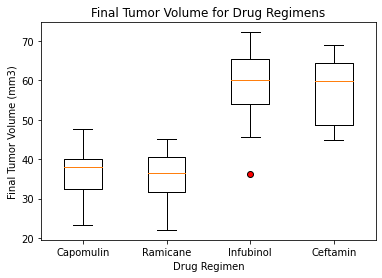

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
red_mark = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots()
ax1.boxplot([Capomulin_data['Tumor Volume (mm3)'], Ramicane_data['Tumor Volume (mm3)'],Infubinol_data['Tumor Volume (mm3)'],Ceftamin_data['Tumor Volume (mm3)']], flierprops=red_mark)
plt.xticks([1,2,3,4],treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume for Drug Regimens')
plt.show()

## Line and Scatter Plots

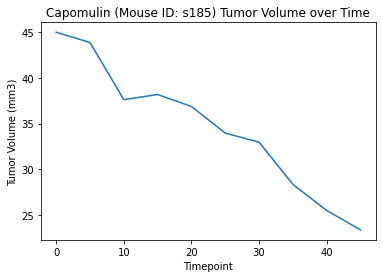

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# get a mouse treated with Capomulin
Capomulin_data = data.loc[data['Drug Regimen'] == 'Capomulin',]
s185_data = Capomulin_data.loc[Capomulin_data['Mouse ID'] == 's185',:]
s185_data = s185_data[['Timepoint','Tumor Volume (mm3)']]
s185_data = s185_data.set_index('Timepoint')

# plot the s185 data
s185_plot = s185_data.plot(kind='line', legend=False)
s185_plot.set_xlabel('Timepoint')
s185_plot.set_ylabel('Tumor Volume (mm3)')
s185_plot.set_title('Capomulin (Mouse ID: s185) Tumor Volume over Time')
plt.show()

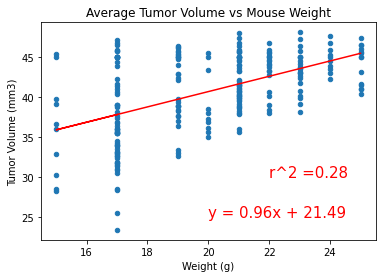

The r^2 value is: 0.2763600223455911
The r correlation factor is: 0.5256995552077166


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = data.loc[data['Drug Regimen'] == 'Capomulin', ]
# capomulin_avg = capomulin_avg['Tumor Volume (mm3)'] 
capomulin_avg.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')

x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.annotate(f'r^2 ={round(rvalue**2,2)}',(22,30),fontsize=15,color="red")
plt.title('Average Tumor Volume vs Mouse Weight')
plt.show()
print(f'The r^2 value is: {rvalue**2}')
print(f'The r correlation factor is: {rvalue}')